In [1]:
import numpy as np 
import pandas as pd


In [2]:
import keras

Using TensorFlow backend.


In [3]:
from keras.datasets import fashion_mnist

In [4]:
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()

In [5]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
from keras.utils import np_utils

In [8]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [9]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [10]:
Y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
import matplotlib.pyplot as plt

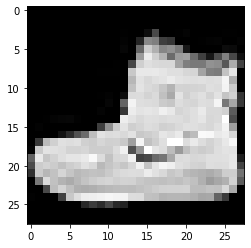

In [13]:
plt.imshow(X_train[0], cmap='gray')

Performing reshaping

In [14]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [15]:
print(X_train.shape)

(60000, 28, 28, 1)


In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Activation, Flatten

Builtin Model 

In [18]:
model = Sequential()
model.add(Conv2D(32,(3,3), 
                input_shape = (28,28,1)))
model.add(Activation('relu'))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16,(3,3)))
model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
activation_6 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 16)        9232      
_________________________________________________________________
activation_7 (Activation)    (None, 10, 10, 16)       

In [19]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [20]:
model.fit(X_train, Y_train,
         validation_data=(X_test, Y_test),
         verbose=2,
         batch_size=16,
         epochs=6)

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
 - 223s - loss: 0.5750 - accuracy: 0.7994 - val_loss: 0.3973 - val_accuracy: 0.8608
Epoch 2/6


KeyboardInterrupt: 